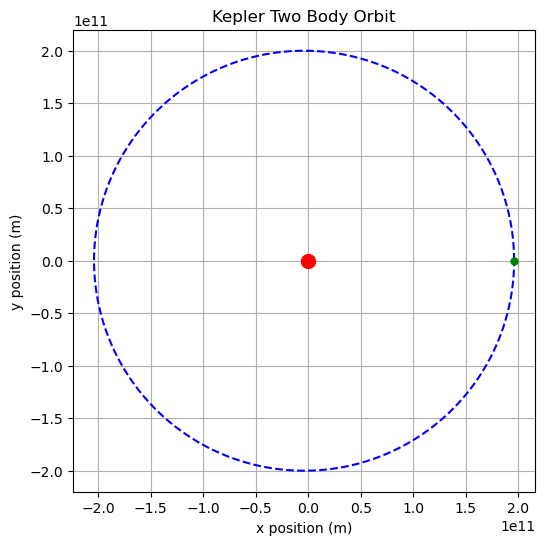

In [253]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from matplotlib.animation import FuncAnimation

# 2D representation (xy axis): 
G = 6.6743e-11 # (m^3)/(kg*s^2)      
def kepler(a,e, mu): 
    """ 
    uses keplers method to solve for the x,y positions in a 2d plane where:
    a = semi-major axis (m) 
    e = eccentricity
    mu = standard gravitational parameter (km^3/s^2) = GM where G is a defined constant
    """
    points = 10000
    n = np.sqrt(mu/a**3)
    T = 2*np.pi*np.sqrt(a**3/mu)
    t = np.linspace(0,T,points)
    M = n*t
    def keplers_equation(M, e):
        E = np.zeros(len(M))
        """
        uses keplers equation to solve for E where:
        M = E - esin(E) = mean anomaly
        E = eccentric anomaly
        r = a(1-ecos(E))
        x = rcos(nu)
        y = rsin(nu)
        nu = true anomaly
        """
        for i in range(len(M)):
            Mi = M[i]
            def f(Ei):
                """
                defines a function in which keplers equation = 0
                """
                return Ei - e*np.sin(Ei)-Mi

            E[i] = brentq(f, 0, 2*np.pi) # from scipy to solve for scalar roots
        return E
    E = keplers_equation(M, e)
    nu = 2*np.arctan2(np.sqrt(1 + e)*np.sin(E/2), np.sqrt(1 - e)*np.cos(E/2))
    r = a*(1 - e*np.cos(E))
    x = r*np.cos(nu)
    y = r*np.sin(nu)
    return x, y, T

def animate(a,e,mu):
    x, y, T = kepler(a,e,mu)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(x,y,'b--', label='Orbit')
    foci, = ax.plot(0,0,'ro', label='Star', markersize=10)
    planet, = ax.plot([], [], color='green', marker='o', label='Planet', markersize=5)
    ax.set_xlabel('x position (m)')
    ax.set_ylabel('y position (m)')
    ax.set_title('Kepler Two Body Orbit')
    ax.set_aspect('equal', adjustable='box')
    ax.grid()

    def init():
        planet.set_data([x[0]], [y[0]])
        return planet,

    def update(frame):
        planet.set_data(x[frame], y[frame])
        return planet,

    anim = FuncAnimation(fig, update, frames=len(x), init_func=init, interval=25, blit=True, repeat=True)
    plt.show()

a = 2e11 # estimated semi-major axis for this model (m)
e = 0.02 # estimated eccentricity for this model
m_foci = 2.2e30 # estimated mass of star/larger mass for this model
mu = G*m_foci

animate(a,e,mu)

# im stuck right now trying to get the animation to run, i have the orbital path so far